# Model Performance and Evaluation Method : bankloan dataset

- Data
- Data Splitting
- Model Evaluation Benchmark


Modeling menggunakan Logistic Regression, KNN, Tree

fitur : 'employ',  'debtinc', 'creddebt','othdebt'
    
target : 'default'

train - valid : 80 - 20

random_state = 2020

> ## Data

In [166]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score,RocCurveDisplay, PrecisionRecallDisplay ,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt



In [239]:
bankloan=pd.read_csv('bankloan.csv')

In [240]:
bankloan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [241]:
bankloan.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

> ## Data Splitting

In [242]:
#fitur
X=bankloan[['employ',  'debtinc', 'creddebt','othdebt']]
#target
y=bankloan['default']

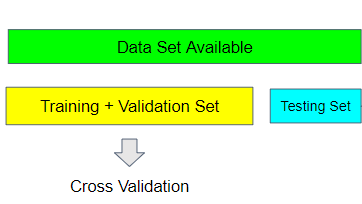

In [243]:
#split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y
                                                    , random_state=2020)

> ## Model Evaluation : Benchmark

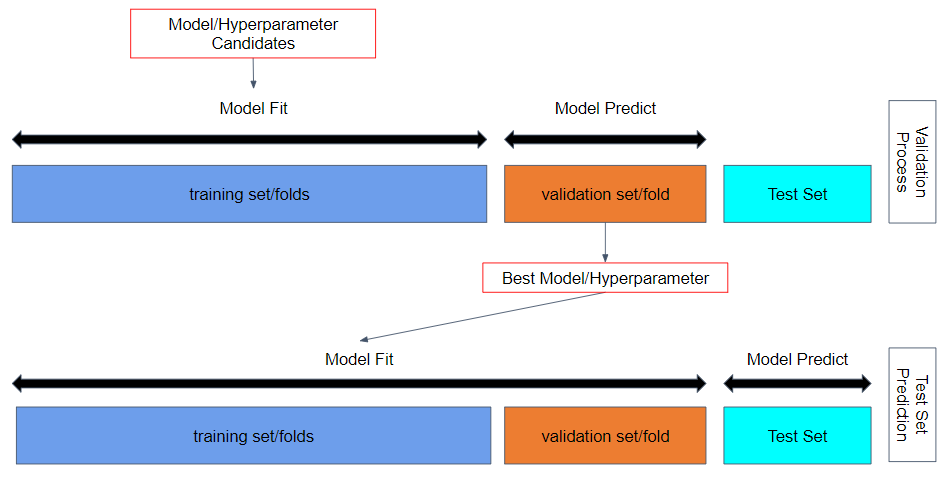

In [244]:
logreg=LogisticRegression(solver='liblinear',random_state=2020)
knn=KNeighborsClassifier(n_neighbors=7)
tree=DecisionTreeClassifier(criterion='entropy',max_depth=3)

`Accuracy`

In [245]:
skfold=StratifiedKFold(n_splits=5)

#cross validasi
logreg_cv=cross_val_score(logreg,X_train,y_train, cv=skfold)
knn_cv=cross_val_score(knn,X_train,y_train, cv=skfold)
tree_cv=cross_val_score(tree,X_train,y_train, cv=skfold)

In [246]:
print('CV logreg',logreg_cv)
print('CV knn',knn_cv)
print('CV tree',tree_cv)


CV logreg [0.79464286 0.79464286 0.83928571 0.79464286 0.77678571]
CV knn [0.73214286 0.71428571 0.78571429 0.76785714 0.74107143]
CV tree [0.83035714 0.67857143 0.82142857 0.73214286 0.79464286]


In [247]:
print('CV logreg',logreg_cv.std())
print('CV knn',knn_cv.std())
print('CV tree',tree_cv.std())


CV logreg 0.020824828195876083
CV knn 0.025505101530510183
CV tree 0.057753434388557956


In [248]:
print('CV logreg',logreg_cv.mean())
print('CV knn',knn_cv.mean())
print('CV tree',tree_cv.mean())


CV logreg 0.8
CV knn 0.7482142857142857
CV tree 0.7714285714285716


`RECALL`

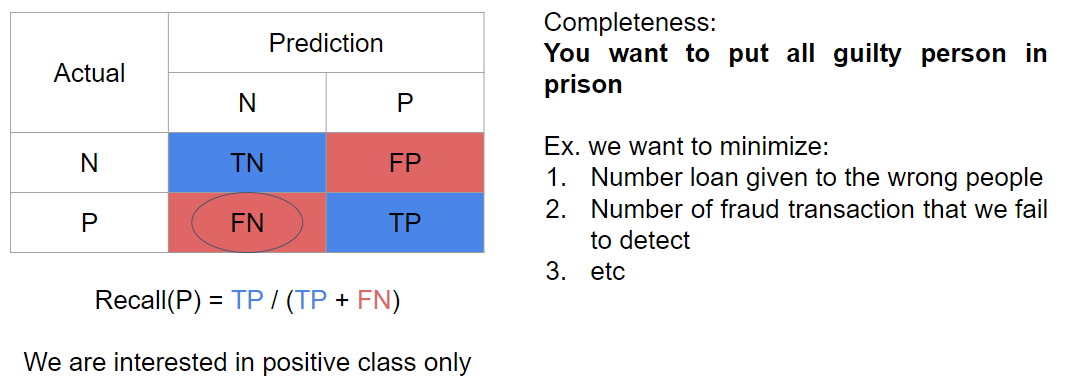

In [249]:
skfold=StratifiedKFold(n_splits=6)

#cross validasi
logreg_cv=cross_val_score(logreg,X_train,y_train, cv=skfold,scoring='recall')
knn_cv=cross_val_score(knn,X_train,y_train, cv=skfold,scoring='recall')
tree_cv=cross_val_score(tree,X_train,y_train, cv=skfold,scoring='recall')

In [250]:
print('CV logreg',logreg_cv)
print('CV knn',knn_cv)
print('CV tree',tree_cv)


CV logreg [0.48       0.36       0.5        0.45833333 0.41666667 0.54166667]
CV knn [0.36       0.36       0.5        0.29166667 0.25       0.33333333]
CV tree [0.6        0.44       0.45833333 0.375      0.29166667 0.25      ]


In [251]:
print('CV logreg',logreg_cv.std())
print('CV knn',knn_cv.std())
print('CV tree',tree_cv.std())


CV logreg 0.058520862587838625
CV knn 0.0778635439822866
CV tree 0.11534469276108088


In [252]:
print('CV logreg',logreg_cv.mean())
print('CV knn',knn_cv.mean())
print('CV tree',tree_cv.mean())


CV logreg 0.4594444444444444
CV knn 0.3491666666666667
CV tree 0.4025


`PRECISION`

In [253]:
skfold=StratifiedKFold(n_splits=6)

#cross validasi
logreg_cv=cross_val_score(logreg,X_train,y_train, cv=skfold,scoring='precision')
knn_cv=cross_val_score(knn,X_train,y_train, cv=skfold,scoring='precision')
tree_cv=cross_val_score(tree,X_train,y_train, cv=skfold,scoring='precision')

In [254]:
print('CV logreg',logreg_cv)
print('CV knn',knn_cv)
print('CV tree',tree_cv)


CV logreg [0.66666667 0.69230769 0.8        0.6875     0.625      0.68421053]
CV knn [0.52941176 0.45       0.6        0.63636364 0.6        0.47058824]
CV tree [0.71428571 0.57894737 0.78571429 0.5        0.4375     0.54545455]


In [255]:
print('CV logreg',logreg_cv.std())
print('CV knn',knn_cv.std())
print('CV tree',tree_cv.std())


CV logreg 0.053030706968296655
CV knn 0.06971105813360555
CV tree 0.12050849183200191


In [256]:
print('CV logreg',logreg_cv.mean())
print('CV knn',knn_cv.mean())
print('CV tree',tree_cv.mean())


CV logreg 0.6926141475483581
CV knn 0.5477272727272727
CV tree 0.5936503189792663


`FLEXIBLE METRICS`

In [257]:
model=LogisticRegression(solver='liblinear',random_state=2020)
metric='f1'
def model_evaluation_cv(model, metric):
    skfold=StratifiedKFold()
    model_cv=cross_val_score(model,X_train,y_train,cv=skfold,scoring=metric)
    return model_cv

In [258]:
def print_result(model_cv):
    print('CV score',model_cv)
    print('CV score std',model_cv.std())
    print('CV score mean',model_cv.mean())
    

In [259]:
metric='precision'
model=[logreg,knn,tree]
for i in model:
    model_cv=model_evaluation_cv(i,metric)
    print(i)
    print_result(model_cv)

LogisticRegression(random_state=2020, solver='liblinear')
CV score [0.65217391 0.75       0.73913043 0.65       0.58333333]
CV score std 0.06210715648609656
CV score mean 0.6749275362318841
KNeighborsClassifier(n_neighbors=7)
CV score [0.5        0.42105263 0.63157895 0.66666667 0.5       ]
CV score std 0.09132922866540609
CV score mean 0.543859649122807
DecisionTreeClassifier(criterion='entropy', max_depth=3)
CV score [0.7037037  0.37931034 0.71428571 0.46666667 0.625     ]
CV score std 0.13300879186973866
CV score mean 0.5777932858967343


`MODEL PERFORMANCE IN TEST SET`

In [260]:
logreg=LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [261]:
y_pred=logreg.predict(X_test)

In [262]:
print('recall',recall_score(y_test,y_pred))
print('precision',precision_score(y_test,y_pred))
print('f1',f1_score(y_test,y_pred))


recall 0.4864864864864865
precision 0.782608695652174
f1 0.6000000000000001


In [263]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



`Precision Recall Curve`

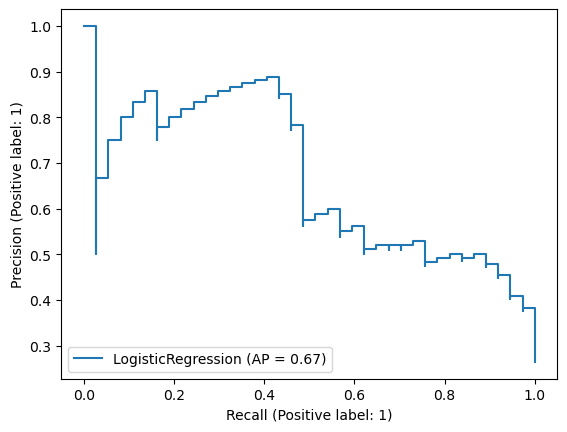

In [264]:
 PrecisionRecallDisplay.from_estimator(logreg,X_test,y_test)

`ROC Curve Display`

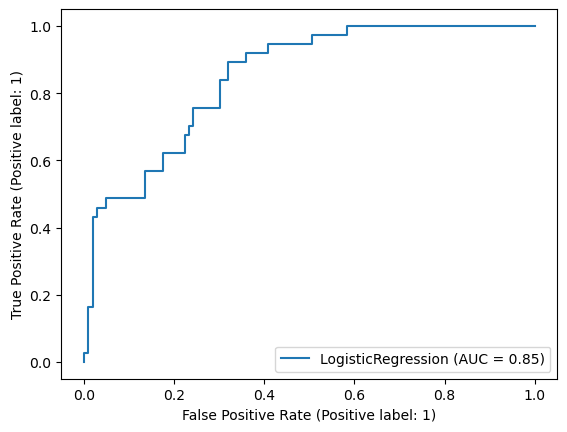

In [265]:
RocCurveDisplay.from_estimator(logreg,X_test,y_test)

> ## Simple Hyperprameter Tuning

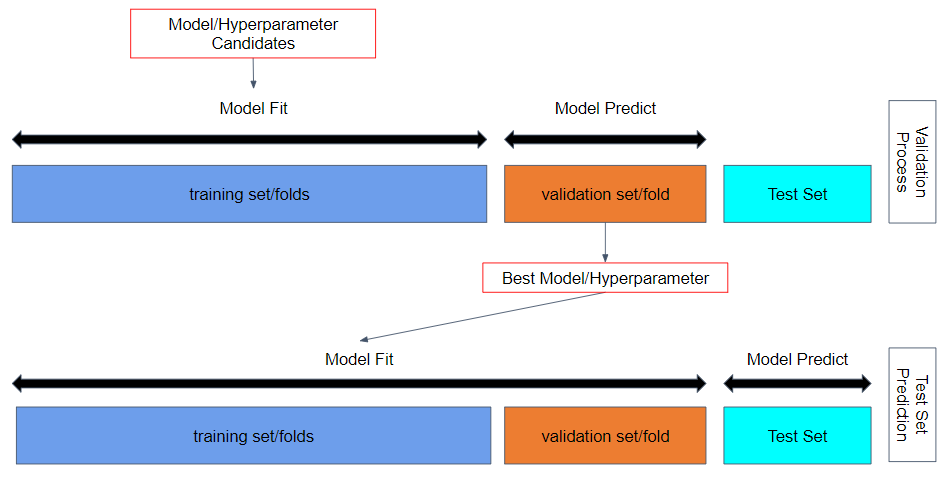

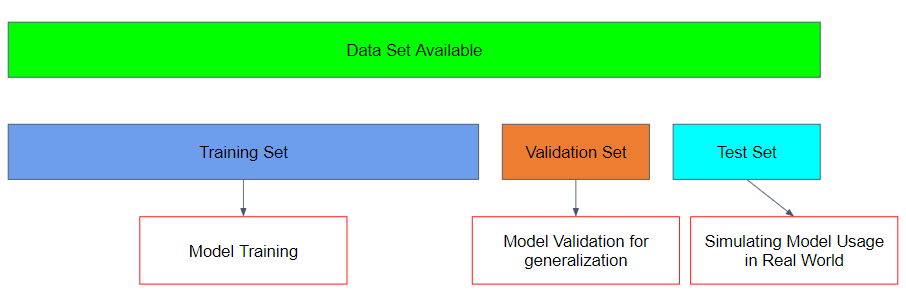

In [266]:
#split
#train : test -> 80 : 20
#train : valid : test ->60:20:20
#60/80 *100 =0.75 proporsi train terhadap train dan valid
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.25, stratify=y_train
                                                    , random_state=2020)

In [267]:
hyperparam_c=[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]
skfold=StratifiedKFold(n_splits=5)

best_score=0
cv_score_validation_fold=[]

for i in hyperparam_c:
    logreg=LogisticRegression(C=i,solver='liblinear',random_state=2020)
    cv_score=cross_val_score(logreg,X_train,y_train, cv=skfold,scoring='f1').mean()
    cv_score_validation_fold.append(cv_score)
    
    if cv_score> best_score:
        best_score=cv_score
        best_params={'C':i}

In [268]:
print('best score', best_score)
print('best params', best_params)

best score 0.5799190589589731
best params {'C': 0.01}


In [269]:
hyperparam_c=[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]
skfold=StratifiedKFold(n_splits=5)

training_score=[]
testing_score=[]

for i in hyperparam_c:
    logreg=LogisticRegression(C=i,solver='liblinear',random_state=2020)
    logreg.fit(X_train, y_train)
    
    y_predict_train=logreg.predict(X_train)
    training_score.append(f1_score(y_train,y_predict_train))
    
    y_predict_val=logreg.predict(X_val)
    testing_score.append(f1_score(y_val,y_predict_val))

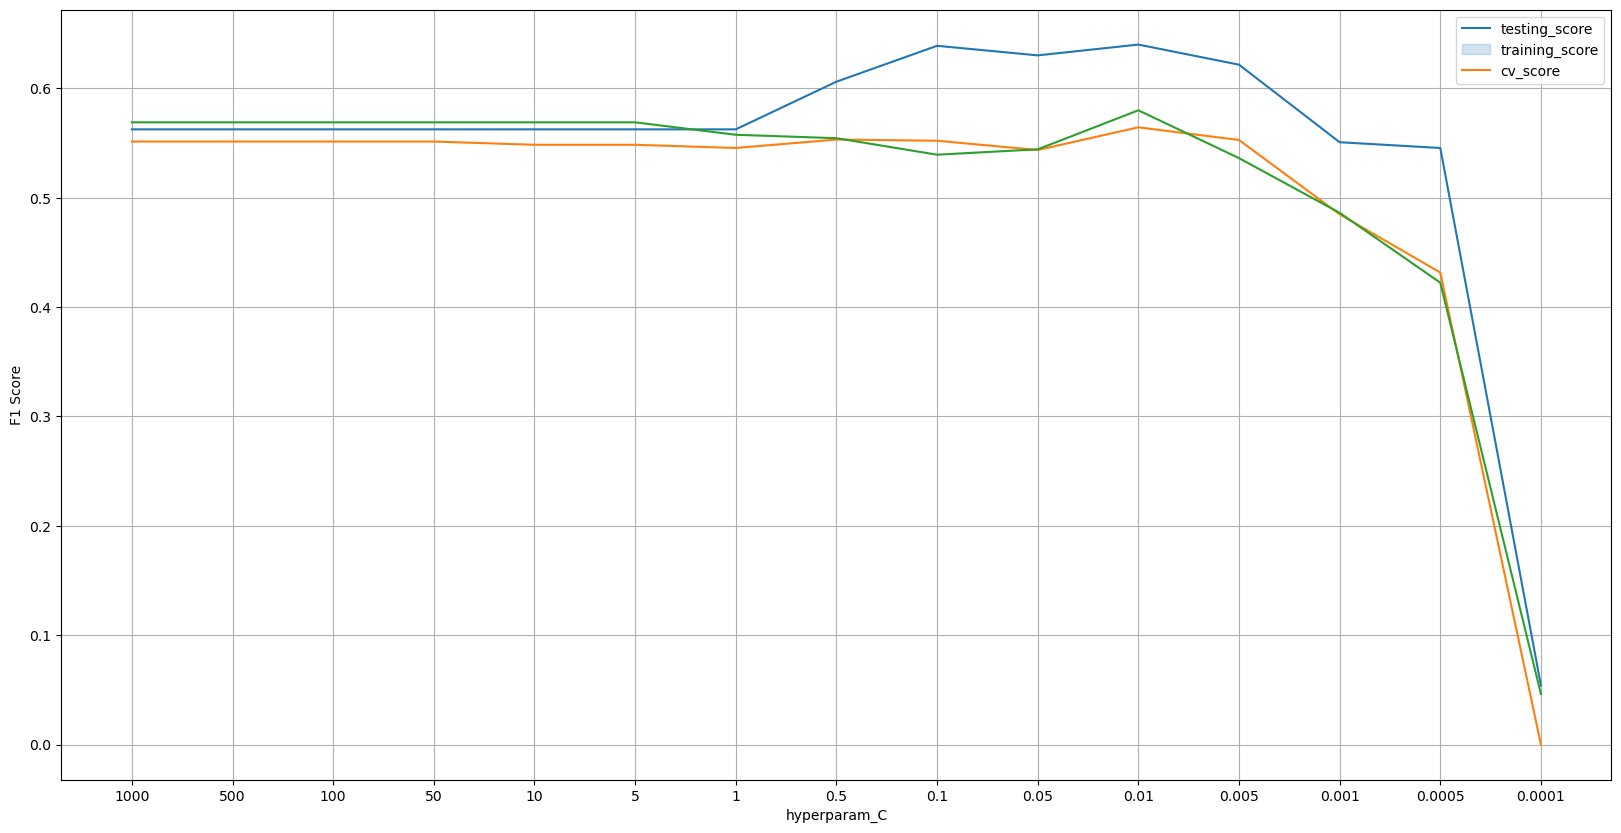

In [270]:
length=range(len(hyperparam_c))

plt.figure(figsize=(20,10))
sns.lineplot(x=length, y=testing_score)
sns.lineplot(x=length, y=training_score)
sns.lineplot(x=length, y=cv_score_validation_fold)
plt.legend(['testing_score','training_score','cv_score'])
plt.xticks(length,hyperparam_c)
plt.xlabel('hyperparam_C')
plt.ylabel('F1 Score')
plt.grid()
plt.show()

In [271]:
max_iter=[200,150,100,50,10]
skfold=StratifiedKFold(n_splits=5)

best_score=0
cv_score_validation_fold=[]

for i in max_iter:
    logreg=LogisticRegression(max_iter=i,solver='liblinear',random_state=2020)
    cv_score=cross_val_score(logreg,X_train,y_train, cv=skfold,scoring='f1').mean()
    cv_score_validation_fold.append(cv_score)
    
    if cv_score> best_score:
        best_score=cv_score
        best_params={'Max Iter':i}

In [272]:
print('best score', best_score)
print('best params', best_params)

best score 0.5575424007002955
best params {'Max Iter': 200}


In [273]:
max_iter=[200,150,100,50,10]
skfold=StratifiedKFold(n_splits=5)


training_score=[]
testing_score=[]

for i in max_iter:
    logreg=LogisticRegression(max_iter=i,solver='liblinear',random_state=2020)
    logreg.fit(X_train, y_train)
    
    y_predict_train=logreg.predict(X_train)
    training_score.append(f1_score(y_train,y_predict_train))
    
    y_predict_val=logreg.predict(X_val)
    testing_score.append(f1_score(y_val,y_predict_val))

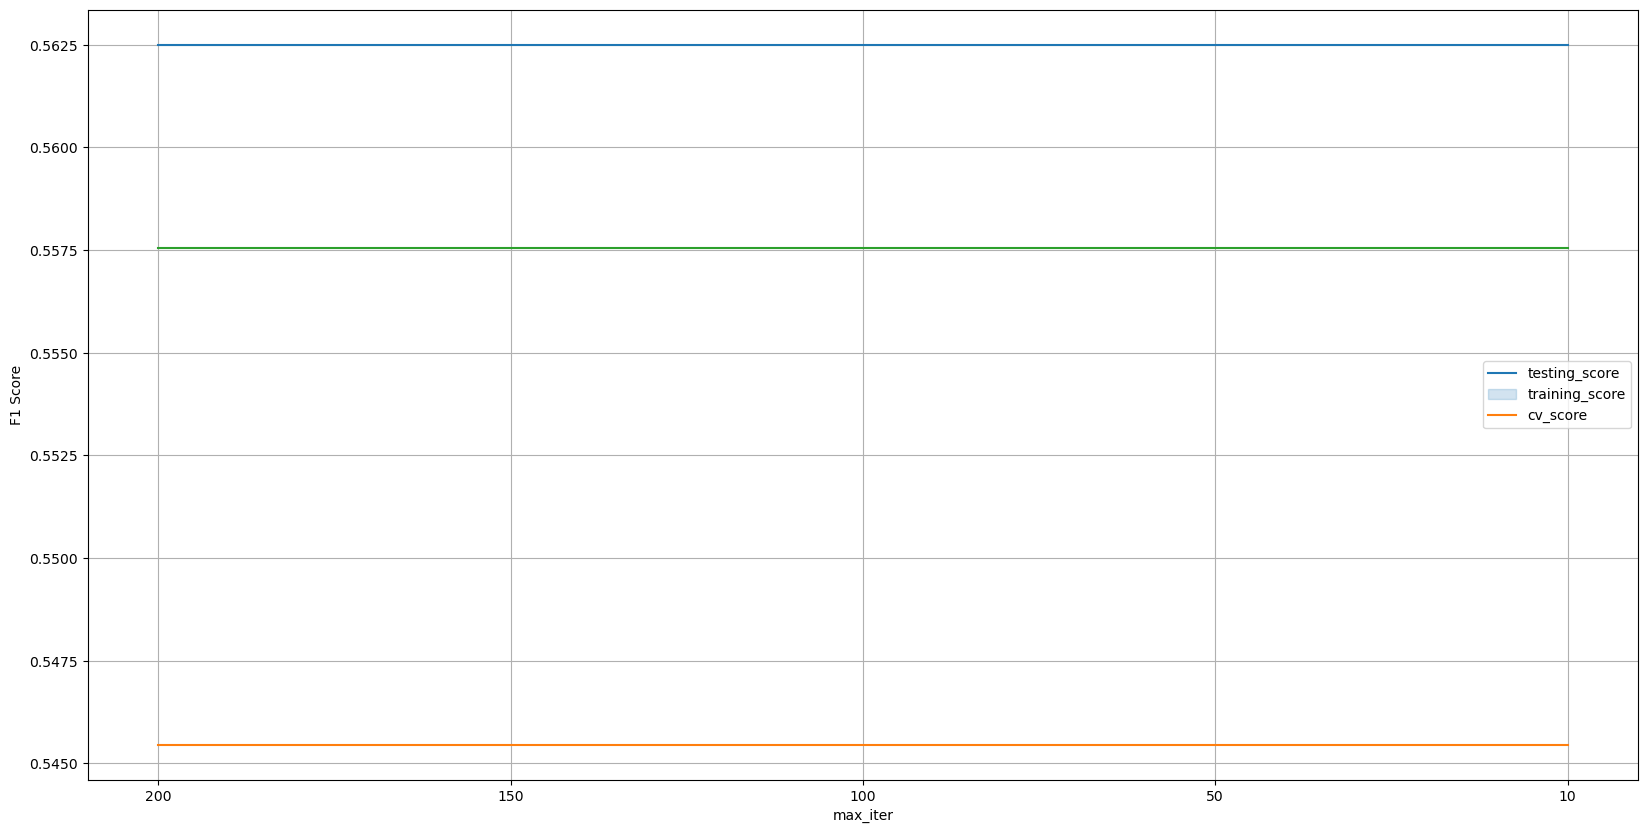

In [274]:
length=range(len(max_iter))

plt.figure(figsize=(20,10))
sns.lineplot(x=length, y=testing_score)
sns.lineplot(x=length, y=training_score)
sns.lineplot(x=length, y=cv_score_validation_fold)
plt.legend(['testing_score','training_score','cv_score'])
plt.xticks(length,max_iter)
plt.xlabel('max_iter')
plt.ylabel('F1 Score')
plt.grid()
plt.show()

> ## Final Result Comparison : Simple Hyperparameter Tuning

FINAL MODEL PERFORMANCE BEFORE

In [292]:
logreg=LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       103
           1       0.64      0.49      0.55        37

    accuracy                           0.79       140
   macro avg       0.74      0.69      0.71       140
weighted avg       0.78      0.79      0.78       140



`Precision Recall Curve`

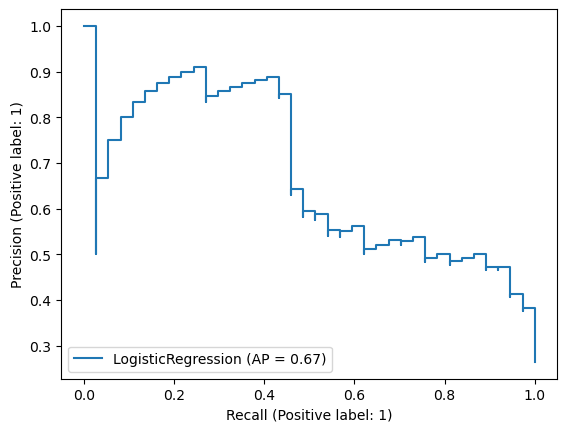

In [293]:
 PrecisionRecallDisplay.from_estimator(logreg,X_test,y_test)

`ROC Curve Display`

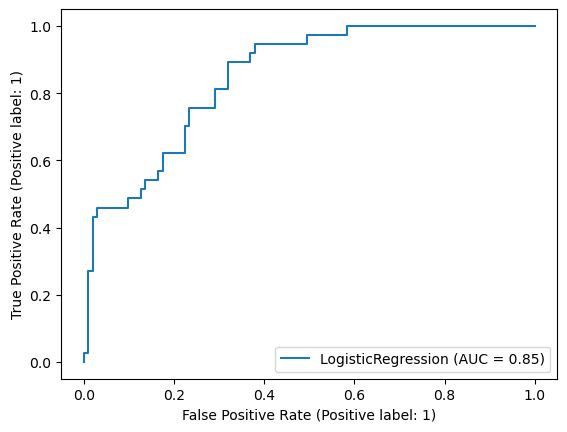

In [294]:
RocCurveDisplay.from_estimator(logreg,X_test,y_test)

FINAL MODEL PERFORMACE AFTER

In [304]:
logreg=LogisticRegression(C=0.01,solver='liblinear')
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       103
           1       0.56      0.59      0.58        37

    accuracy                           0.77       140
   macro avg       0.71      0.71      0.71       140
weighted avg       0.78      0.77      0.77       140



`Precision Recall Curve`

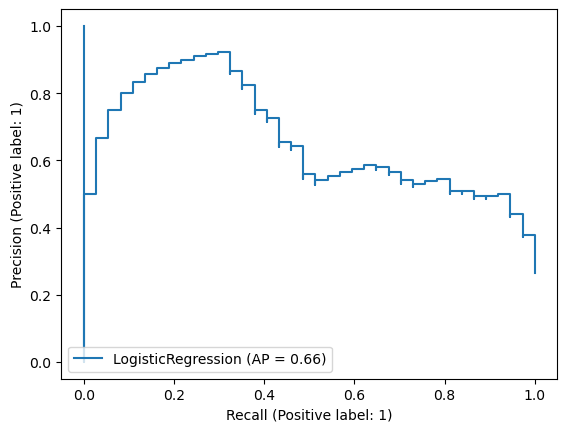

In [305]:
 PrecisionRecallDisplay.from_estimator(logreg,X_test,y_test)

`ROC Curve Display`

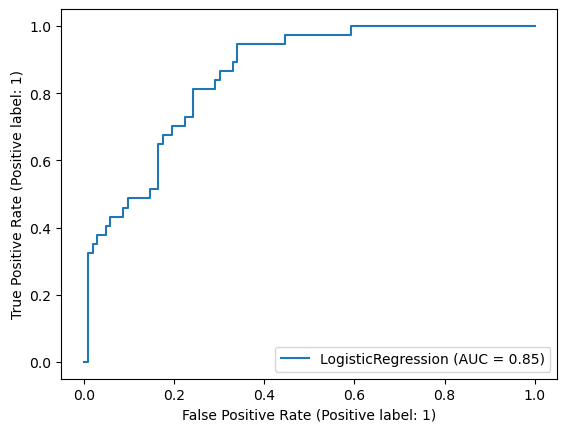

In [306]:
RocCurveDisplay.from_estimator(logreg,X_test,y_test)

Dalam hal F1-Score, performa model mengalami penurunan setelah tuning Hyperparamer. Hal ini terjadi mungkin karena:
1. peningkatan skor cros validasi tidak signifikan
1. pilihan hyperparameter yang dipiluh, mengakibatkan model overfit/tidak stabil

solusi:
1. mengubah model
1. tambah parameter lain yang belum dicoba

> ## Hyperparameter Tuning Grid Search

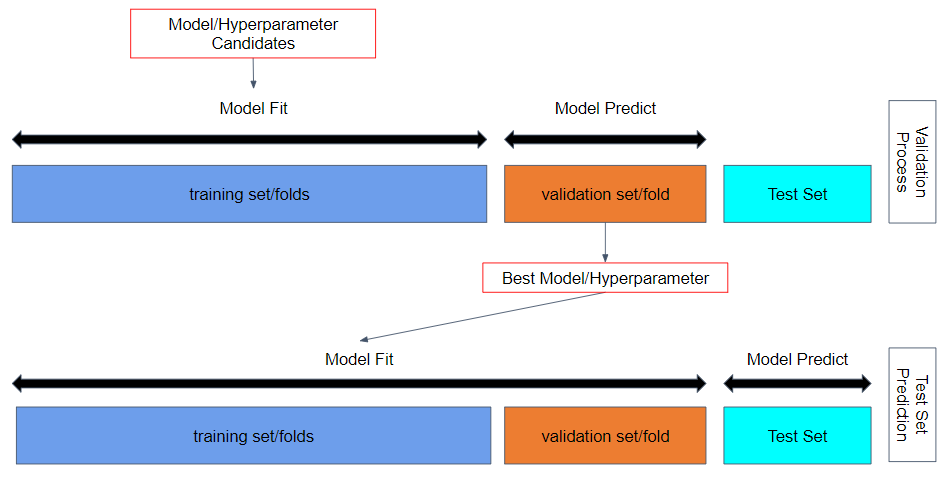

In [298]:
from sklearn.model_selection import GridSearchCV

In [307]:
hyperparam_space={
'C':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001], #default=1
'max_iter':[400,300,200,100,50,10] #default=100
,'penalty':['l1', 'l2'],


}

1. C  -> 15 hyperparameter
1. max_iter -> 6 hyperparameter
1. CV 5 fold

total iterasi ada sebanyak 15 * 6 * 5 = 450 iterasi

In [312]:
skfold=StratifiedKFold(n_splits=5)
logreg=LogisticRegression(solver='liblinear',random_state=2020)

grid_search=GridSearchCV(
logreg, #model ML
    param_grid=hyperparam_space,#hyperparameter space
    cv=skfold, #evaluation method
    scoring='f1',
    n_jobs=-1
)

In [314]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=2020,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'solver': ['liblinear', 'newton-cg']},
             scoring='f1')

In [48]:
print('best score', grid_search.best_score_)
print('best params', grid_search.best_params_)

best score 0.5799190589589731
best params {'C': 0.01, 'max_iter': 400, 'penalty': 'l2'}


In [49]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005865,0.002575,0.003493,0.001566,1000,400,l1,"{'C': 1000, 'max_iter': 400, 'penalty': 'l1'}",0.615385,0.611111,0.486486,0.5,0.631579,0.568912,0.062306,7
1,0.002297,0.000824,0.002229,0.001494,1000,400,l2,"{'C': 1000, 'max_iter': 400, 'penalty': 'l2'}",0.615385,0.611111,0.486486,0.5,0.631579,0.568912,0.062306,7
2,0.002897,0.001292,0.002173,0.001139,1000,300,l1,"{'C': 1000, 'max_iter': 300, 'penalty': 'l1'}",0.615385,0.611111,0.486486,0.5,0.631579,0.568912,0.062306,7
3,0.002744,0.001464,0.001948,0.001796,1000,300,l2,"{'C': 1000, 'max_iter': 300, 'penalty': 'l2'}",0.615385,0.611111,0.486486,0.5,0.631579,0.568912,0.062306,7
4,0.003681,0.001501,0.011194,0.017226,1000,200,l1,"{'C': 1000, 'max_iter': 200, 'penalty': 'l1'}",0.615385,0.611111,0.486486,0.5,0.631579,0.568912,0.062306,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.000874,0.000083,0.000740,0.000022,0.0001,100,l2,"{'C': 0.0001, 'max_iter': 100, 'penalty': 'l2'}",0.000000,0.000000,0.230769,0.0,0.000000,0.046154,0.092308,157
176,0.000875,0.000102,0.000757,0.000035,0.0001,50,l1,"{'C': 0.0001, 'max_iter': 50, 'penalty': 'l1'}",0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,163
177,0.000891,0.000075,0.000745,0.000033,0.0001,50,l2,"{'C': 0.0001, 'max_iter': 50, 'penalty': 'l2'}",0.000000,0.000000,0.230769,0.0,0.000000,0.046154,0.092308,157
178,0.000884,0.000040,0.000779,0.000014,0.0001,10,l1,"{'C': 0.0001, 'max_iter': 10, 'penalty': 'l1'}",0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,163


> ## Final Result Comparison : Hyperparameter Tuning Grid Search

FINAL MODEL PERFORMANCE BEFORE

In [50]:
logreg=LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       103
           1       0.64      0.49      0.55        37

    accuracy                           0.79       140
   macro avg       0.74      0.69      0.71       140
weighted avg       0.78      0.79      0.78       140



`Precision Recall Curve`

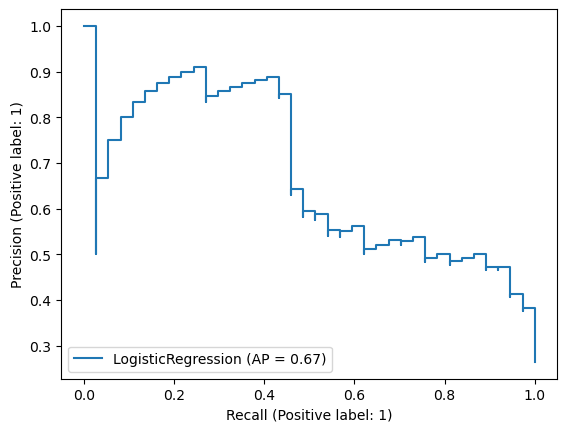

In [51]:
 PrecisionRecallDisplay.from_estimator(logreg,X_test,y_test)

`ROC Curve Display`

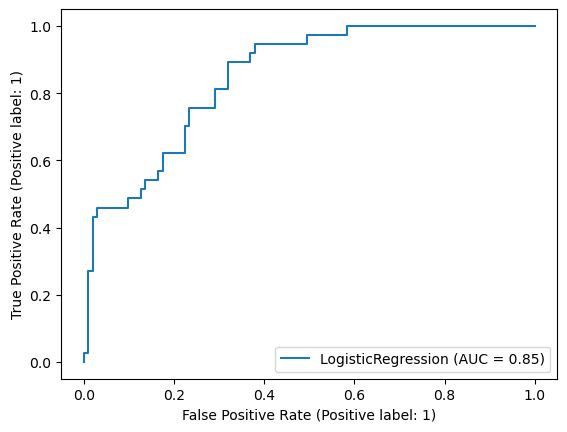

In [52]:
RocCurveDisplay.from_estimator(logreg,X_test,y_test)

FINAL MODEL PERFORMACE AFTER

In [53]:
logreg=LogisticRegression(C=0.01,max_iter=400,solver='liblinear')
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       103
           1       0.56      0.59      0.58        37

    accuracy                           0.77       140
   macro avg       0.71      0.71      0.71       140
weighted avg       0.78      0.77      0.77       140



`Precision Recall Curve`

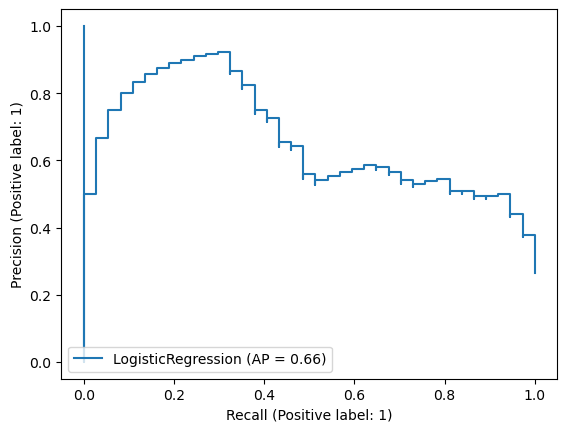

In [54]:
 PrecisionRecallDisplay.from_estimator(logreg,X_test,y_test)

`ROC Curve Display`

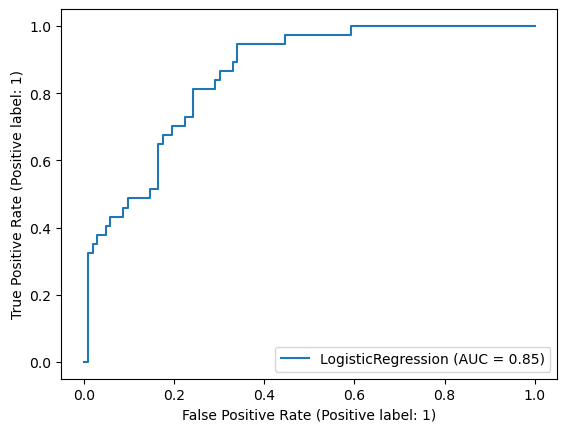

In [55]:
RocCurveDisplay.from_estimator(logreg,X_test,y_test)

# Model Performance and Evaluation Method : tips dataset

> ## Data

Dataset : Tips

Fitur : selain tips(encoding)

Target= tip

Train-test : 80:20

randomstate : 2020


metric : MSE

Model : Tree regresor(max_depth 5, random_state 2020)
        Linear regression()
        
1. Cross Validasi MSE (Tree, LinReg)
1. Model Performance

In [56]:
tips=sns.load_dataset('tips')

In [57]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


> ## Data Splitting

In [58]:
#encoding
X=pd.get_dummies(tips.drop('tip',axis=1))
y=tips['tip']

In [59]:
#split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2020)

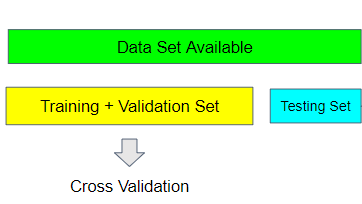

> ## Model Evaluation : Benchmark

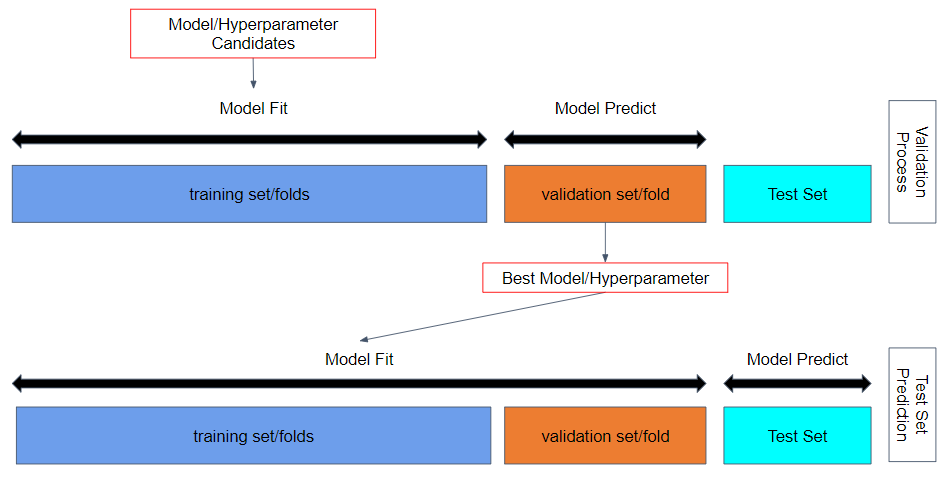

In [60]:
tree=DecisionTreeRegressor(max_depth=5,random_state=2020)
linreg=LinearRegression()

In [61]:
tree_cv=cross_val_score(tree,X_train,y_train,scoring='neg_mean_squared_error')
linreg_cv=cross_val_score(linreg,X_train,y_train, scoring='neg_mean_squared_error')


In [62]:
print('CV tree',tree_cv)
print('CV linreg',linreg_cv)


CV tree [-1.0686013  -0.97814478 -1.77873212 -1.19898146 -1.19188762]
CV linreg [-0.87304358 -0.84277215 -1.05989713 -1.77937311 -1.10502143]


In [63]:
print('CV tree',tree_cv.std())
print('CV linreg',linreg_cv.std())


CV tree 0.28004351146399903
CV linreg 0.3393316319526623


In [64]:
print('CV tree',tree_cv.mean())
print('CV linreg',linreg_cv.mean())


CV tree -1.2432694552627068
CV linreg -1.1320214803006685


MODEL PERFORMANCE on TEST SET

In [65]:
tree=DecisionTreeRegressor(max_depth=5,random_state=2020)
tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=2020)

In [66]:
y_pred=tree.predict(X_test)

In [67]:
print(mean_squared_error(y_test,y_pred))

1.4808803946104496


<Axes: ylabel='tip'>

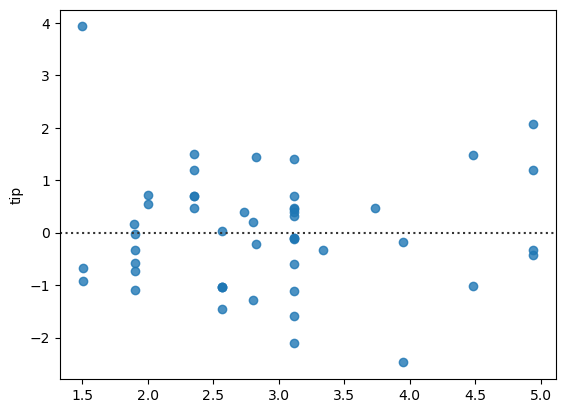

In [68]:
residual=y_test-y_pred

sns.residplot(x=y_pred, y=residual)

> ## Hyperparameter Tuning Randomized Search

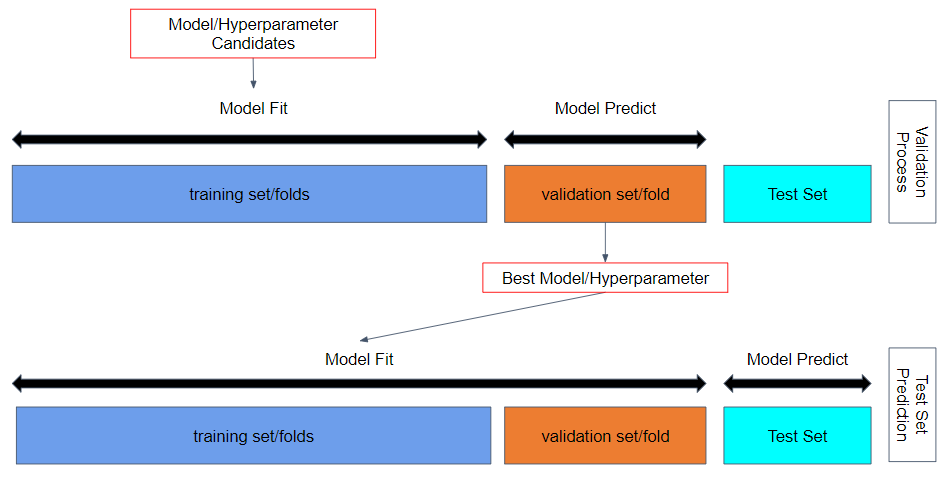

In [69]:
#librari randomize
from sklearn.model_selection import RandomizedSearchCV

In [70]:
hyperparam_space={
    'min_samples_leaf':[1,5,10,15,20,50],#default=1
    'max_depth':[2,3,4,5,6,7],#bencmark max_depth =5
    'criterion':['squared_error','absolute_error']
}

1. min sample leaf 6 hyperparameter
1. max depth 6 hyperparameter
1. CV 5 fold

6 * 6 * 5 =180

In [71]:
tree= DecisionTreeRegressor(max_depth=5, random_state=2020)

randomized_search=RandomizedSearchCV(
    tree,
    param_distributions=hyperparam_space,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=2020,
    n_jobs=-1
)
randomized_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeRegressor(max_depth=5,
                                                   random_state=2020),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 5, 10, 15, 20,
                                                             50]},
                   random_state=2020, scoring='neg_mean_squared_error')

In [72]:
print('best score', randomized_search.best_score_)
print('best params', randomized_search.best_params_)

best score -0.9829038972124049
best params {'min_samples_leaf': 1, 'max_depth': 4, 'criterion': 'squared_error'}


In [73]:
pd.DataFrame(randomized_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002907,0.001317,0.001020,0.000586,1,2,absolute_error,"{'min_samples_leaf': 1, 'max_depth': 2, 'crite...",-0.738330,-0.851707,-1.323954,-1.509013,-1.356648,-1.155931,0.303358,3
1,0.001243,0.000587,0.000692,0.000395,5,7,squared_error,"{'min_samples_leaf': 5, 'max_depth': 7, 'crite...",-1.266981,-0.767827,-1.325200,-2.239966,-1.472244,-1.414444,0.475952,19
2,0.001215,0.000400,0.000914,0.000510,5,4,squared_error,"{'min_samples_leaf': 5, 'max_depth': 4, 'crite...",-1.144108,-0.817462,-1.375826,-2.197390,-1.445703,-1.396098,0.456784,18
3,0.001923,0.000989,0.000724,0.000429,20,2,absolute_error,"{'min_samples_leaf': 20, 'max_depth': 2, 'crit...",-0.722048,-1.093600,-1.182453,-1.955167,-1.356648,-1.261983,0.403899,6
4,0.003935,0.000852,0.001287,0.000587,5,2,absolute_error,"{'min_samples_leaf': 5, 'max_depth': 2, 'crite...",-0.722048,-1.093600,-1.215538,-1.960931,-1.356648,-1.269753,0.404778,8
5,0.001941,0.000881,0.001027,0.000442,50,7,squared_error,"{'min_samples_leaf': 50, 'max_depth': 7, 'crit...",-0.879731,-0.900169,-1.479036,-2.103678,-1.437448,-1.360013,0.450628,12
6,0.002076,0.000942,0.001020,0.000574,1,4,squared_error,"{'min_samples_leaf': 1, 'max_depth': 4, 'crite...",-0.771622,-0.665101,-1.593723,-1.029129,-0.854944,-0.982904,0.327795,1
7,0.001971,0.000913,0.000803,0.000413,5,3,squared_error,"{'min_samples_leaf': 5, 'max_depth': 3, 'crite...",-0.987999,-0.897975,-1.295115,-2.212884,-1.413923,-1.361579,0.466126,14
8,0.001909,0.000498,0.000514,0.000014,20,4,absolute_error,"{'min_samples_leaf': 20, 'max_depth': 4, 'crit...",-0.805774,-1.082392,-1.204603,-1.997315,-1.332621,-1.284541,0.396694,9
9,0.000944,0.000126,0.000649,0.000364,1,2,squared_error,"{'min_samples_leaf': 1, 'max_depth': 2, 'crite...",-0.816130,-0.882642,-1.424336,-1.108872,-0.924132,-1.031222,0.219261,2


> ## Final Result Comparison

FINAL MODEL PERFORMANCE BEFORE

In [74]:
tree=DecisionTreeRegressor(max_depth=5,random_state=2020)
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)
print(mean_squared_error(y_test,y_pred))

1.4808803946104496


FINAL MODEL PERFORMACE AFTER

In [75]:
tree=randomized_search.best_estimator_
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)
print(mean_squared_error(y_test,y_pred))

1.3093536770005814


# Information Leakage

data:
- generate data
- y~normal(mean=0,std=0,n=100)
- X~normal(mean=0,std=0,n=100,dimension=10000) - y and X uncorrelated each other (no relationship)
- Information leakage
- modeling X and y using linear regression + percentile feature selection (f statistics)
- do feature selection : apply fit and transform to X
- compute R-square using cross validation
- No Information leakage
- modeling X and y using linear regression + percentile feature selection (f
statistics)
- make pipeline : feature selection + regression
- compute R-square using cross validation

In [76]:
rnd=np.random.RandomState(seed=2020)
X=rnd.normal(size=(100,10000))
y=rnd.normal(size=(100,))

> ## Information Leakage

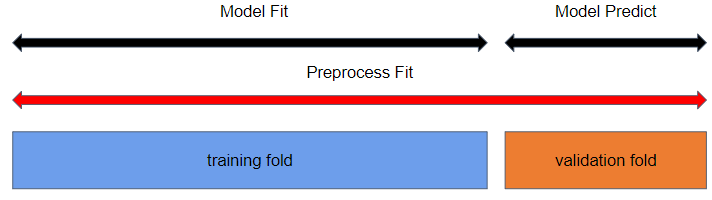

In [77]:
from sklearn.feature_selection import SelectPercentile, f_regression
select=SelectPercentile(score_func=f_regression,percentile=5)
select.fit(X,y)

SelectPercentile(percentile=5,
                 score_func=<function f_regression at 0x1625a59e0>)

In [78]:
X_selected=select.transform(X)
X_selected.shape

(100, 500)

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

In [80]:
cross_val_score(Ridge(), X_selected, y, cv=5)

array([0.92165345, 0.89445668, 0.92827414, 0.93088559, 0.91044624])

> ## No Information Leakage

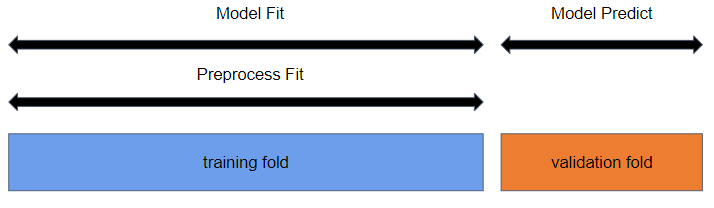

In [81]:
from sklearn.pipeline import Pipeline

In [82]:
select=SelectPercentile(score_func=f_regression,percentile=5)

pipe=Pipeline([
    ("select",select),
    ("ride", Ridge())
])

In [83]:
cross_val_score(pipe, X, y, cv=5)

array([-0.0330359 , -0.07840338, -0.06731106, -0.04544685, -0.07314928])

# Algorithm Chains : adult dataset

> ## Data

In [84]:
!pip install category_encoders


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


data : adult.csv 

target : income preprocess:
1. missing value : simple imputer with constant
1. one hot encoding : relationship, race, sex
1. binary encoding : workclass, marital status, occupation, native country
1. ordinal encoding : education (already encoded)
1. no treatment : numerical
1. out : fnlwgt

Random state 10, data splitting 70:30
1. model Tree(max depth 5, criterion entropy) and compute f1 using CV
1. Compute another metrics
1. model Logistic Regression (solver liblinear) compute recall +, precision +, f1 +, make ROC and PRC in test set
1. do hyperparameter tuning for logistic regression (optimize C and solver) optimized by f1 and using stratified CV  fold
1. compare the result (before and after) ini test set

In [85]:
import pandas as pd
import numpy as np
        
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, recall_score, precision_score

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.pipeline import Pipeline

In [315]:
df_adult = pd.read_csv('adult.csv')

In [316]:
df_adult.replace('?',np.nan,inplace = True)

In [317]:
df_adult

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


> ## Preprocessing

In [318]:
# binary_encoder_pipeline=Pipeline([
#     ('imputer',SimpleImputer(strategy='constant',fill_value='NC')),
#     ('binary encoder',ce.BinaryEncoder())
# ])

# transformer=ColumnTransformer([
#     ('one hot encoder', OneHotEncoder(drop='first'),['relationship', 'race', 'sex']),
#     ('binary encoder', ce.BinaryEncoder(),['workclass', 'marital.status', 'occupation', 'native.country'])
# ], remainder='passthrough')

In [319]:
binary_encoder_pipeline = Pipeline([
                                    ('imputer',SimpleImputer(strategy = 'constant',fill_value = 'NC')),
                                    ('binary encoder',ce.BinaryEncoder())
])

transformer = ColumnTransformer([
                                 ('one hot encoder',OneHotEncoder(drop = 'first'),['relationship','race','sex']),
                                 ('binary encoder',binary_encoder_pipeline,['workclass','marital.status','occupation','native.country'])
                                ], remainder = 'passthrough')

> ## Data Splitting

In [320]:
X = df_adult.drop(columns = ['fnlwgt','income','education'])
y = np.where(df_adult['income']=='>50K',1,0)

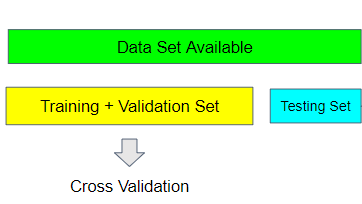

In [321]:
from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify = y, 
    random_state = 2020)

> ## Model Evaluation : Benchmark  

In [322]:
skfold=StratifiedKFold(n_splits=5)

tree=DecisionTreeClassifier(max_depth=5,criterion='entropy',random_state=2020)

estimator=Pipeline([
    ('preprocess',transformer),
    ('clf',tree)
])

In [323]:
model_cv = cross_val_score(estimator, X_train, y_train, scoring='f1')

In [324]:
print('CV Score', model_cv.mean())
print('CV Score mean', model_cv)
print('CV Score std', model_cv.std())

CV Score 0.6079607686024484
CV Score mean [0.59255482 0.60502513 0.59898477 0.62110553 0.6221336 ]
CV Score std 0.011833711368265581


FLEXIBLE METRICS

In [325]:
def model_evaluation_cv(model, metric):
  skfold = StratifiedKFold(n_splits = 5)
  estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',model)])
  model_cv = cross_val_score(estimator, X_train, y_train, cv = skfold, scoring = metric)
  return model_cv

In [326]:
def print_result(model_cv):
  print('CV score',model_cv)
  print('CV score mean',model_cv.mean())
  print('CV score std',model_cv.std())

In [327]:
model = LogisticRegression(solver = 'liblinear', random_state = 2020)
metric = 'f1'

model_cv = model_evaluation_cv(model, 'f1')
print_result(model_cv)

CV score [0.60656541 0.66259398 0.63331714 0.64204545 0.6657277 ]
CV score mean 0.6420499384792672
CV score std 0.02153187290451862


In [328]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 2020)
metric = 'f1'

model_cv = model_evaluation_cv(model, 'f1')
print_result(model_cv)

CV score [0.59255482 0.60502513 0.59898477 0.62110553 0.6221336 ]
CV score mean 0.6079607686024484
CV score std 0.011833711368265581


MODEL PERFORMANCE

In [329]:
model=LogisticRegression(solver='liblinear',random_state=2020)

estimator=Pipeline([
    ('preprocess',transformer),
    ('clf',model)
])
estimator.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['relationship', 'race',
                                                   'sex']),
                                                 ('binary encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NC',
                                                                                 strategy='constant')),
                                                                  ('binary '
                                                                   'encoder',
                                                                   BinaryEncoder())]),
                                                  ['workclass',
                                                   'marital.status',
                                                   'occupation',
                                                   'native.country'])])),
                ('clf',
                 LogisticRegression(random_state=2020, solver='liblinear'))])

In [330]:
y_pred=estimator.predict(X_test)

In [331]:
print('recall', recall_score(y_test,y_pred))
print('precision', precision_score(y_test,y_pred))
print('F1 Score', f1_score(y_test,y_pred))

recall 0.588265306122449
precision 0.7334605597964376
F1 Score 0.6528878822197056


In [332]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6181
           1       0.73      0.59      0.65      1960

    accuracy                           0.85      8141
   macro avg       0.81      0.76      0.78      8141
weighted avg       0.84      0.85      0.84      8141



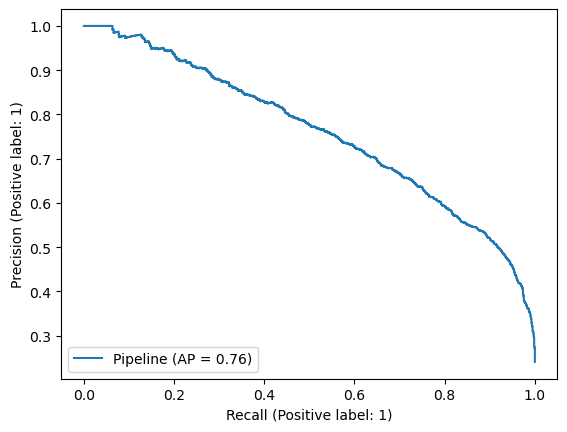

In [333]:
 PrecisionRecallDisplay.from_estimator(estimator,X_test,y_test)

`ROC Curve Display`

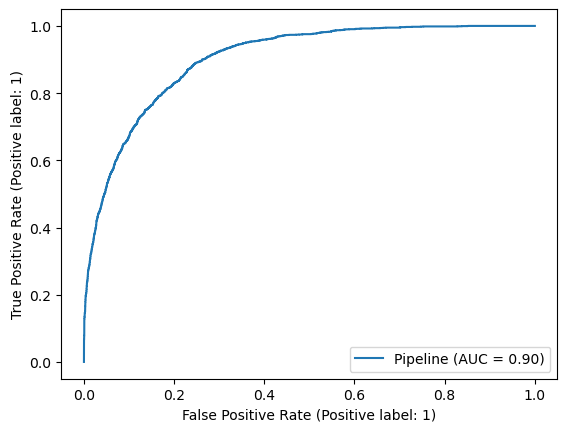

In [334]:
RocCurveDisplay.from_estimator(estimator,X_test,y_test)

> ## Hyperparameter Tuning

In [338]:
model=LogisticRegression(solver='liblinear',random_state=2020)

estimator=Pipeline([
    ('preprocess',transformer),
    ('clf',model)
])

hyperparam_space={
    'C':[100,10,1,0.1,0.01,0.001],
    'solver':['liblinear', 'newton-cg']
}

skfold=StratifiedKFold(n_splits=5)


grid_search=GridSearchCV(
estimator, #model ML
    param_grid=hyperparam_space,#hyperparameter space
    cv=skfold, #evaluation method
    scoring='f1',
    n_jobs=-1
)

In [339]:
grid_search.fit(X_train,y_train)

ValueError: Invalid parameter 'C' for estimator Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['relationship', 'race',
                                                   'sex']),
                                                 ('binary encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NC',
                                                                                 strategy='constant')),
                                                                  ('binary '
                                                                   'encoder',
                                                                   BinaryEncoder())]),
                                                  ['workclass',
                                                   'marital.status',
                                                   'occupation',
                                                   'native.country'])])),
                ('clf',
                 LogisticRegression(random_state=2020, solver='liblinear'))]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [136]:
print('best score', grid_search.best_score_)
print('best params', grid_search.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [49]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005865,0.002575,0.003493,0.001566,1000,400,l1,"{'C': 1000, 'max_iter': 400, 'penalty': 'l1'}",0.615385,0.611111,0.486486,0.5,0.631579,0.568912,0.062306,7
1,0.002297,0.000824,0.002229,0.001494,1000,400,l2,"{'C': 1000, 'max_iter': 400, 'penalty': 'l2'}",0.615385,0.611111,0.486486,0.5,0.631579,0.568912,0.062306,7
2,0.002897,0.001292,0.002173,0.001139,1000,300,l1,"{'C': 1000, 'max_iter': 300, 'penalty': 'l1'}",0.615385,0.611111,0.486486,0.5,0.631579,0.568912,0.062306,7
3,0.002744,0.001464,0.001948,0.001796,1000,300,l2,"{'C': 1000, 'max_iter': 300, 'penalty': 'l2'}",0.615385,0.611111,0.486486,0.5,0.631579,0.568912,0.062306,7
4,0.003681,0.001501,0.011194,0.017226,1000,200,l1,"{'C': 1000, 'max_iter': 200, 'penalty': 'l1'}",0.615385,0.611111,0.486486,0.5,0.631579,0.568912,0.062306,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.000874,0.000083,0.000740,0.000022,0.0001,100,l2,"{'C': 0.0001, 'max_iter': 100, 'penalty': 'l2'}",0.000000,0.000000,0.230769,0.0,0.000000,0.046154,0.092308,157
176,0.000875,0.000102,0.000757,0.000035,0.0001,50,l1,"{'C': 0.0001, 'max_iter': 50, 'penalty': 'l1'}",0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,163
177,0.000891,0.000075,0.000745,0.000033,0.0001,50,l2,"{'C': 0.0001, 'max_iter': 50, 'penalty': 'l2'}",0.000000,0.000000,0.230769,0.0,0.000000,0.046154,0.092308,157
178,0.000884,0.000040,0.000779,0.000014,0.0001,10,l1,"{'C': 0.0001, 'max_iter': 10, 'penalty': 'l1'}",0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,163


In [ ]:
skfold=StratifiedKFold(n_splits=5)
logreg=LogisticRegression(solver='liblinear',random_state=2020)

grid_search=GridSearchCV(
logreg, #model ML
    param_grid=hyperparam_space,#hyperparameter space
    cv=skfold, #evaluation method
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train,y_train)

print('best score', grid_search.best_score_)
print('best params', grid_search.best_params_)

pd.DataFrame(grid_search.cv_results_)

> ## Final Result Comparison

MODEL PERFORMANCE BEFORE

MODEL PERFORMANCE AFTER